In [295]:
from matplotlib import pyplot as plt
from collections import Counter
from itertools import chain
import seaborn as sns
import pandas as pd
import json

In [296]:
def show_heatchart(tk):
    
    data = []

    for row_k in tk:
        
        row_vals = []
        
        for col_k in tk:
            df_a = df[df.keywords.apply(lambda x: row_k in x)]
            df_b = df_a[df_a.keywords.apply(lambda x: col_k in x)]
            row_vals.append(int((len(df_b) / len(df_a)) * 100))
            
        data.append(row_vals)

    d = pd.DataFrame(data, index=[*tk], columns=[*tk])

    plt.figure(figsize=(15, 10))

    corr = d.corr()
    ax = sns.heatmap(corr, center=0,cmap='bone_r', square=True)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right');

In [297]:
events = json.load(open('gdelt_hate.json', 'rb'))

In [298]:
df = pd.DataFrame.from_dict(events).transpose()

keys = df['keywords'].apply(pd.Series)
keys = keys.rename(columns = lambda x : 'k_' + str(x))
df  = pd.concat([df[:], keys[:]], axis=1)

df.reset_index(inplace=True)
df.rename(index=str, columns={"index": "start_end"}, inplace=True)

df['start'] = df['start_end'].apply(lambda x: x[:8])
df['end']   = df['start_end'].apply(lambda x: x[-8:])
df['year']  = df['start_end'].apply(lambda x: x[:4])

df.fillna(0, inplace=True)
df.sort_values('start_end', inplace=True)

df

,start_end,articles,ascent,descent,keywords,length,movement,tone,k_0,k_1,...,k_7,k_8,k_9,k_10,k_11,k_12,k_13,start,end,year
0,20150413_20150420,652,2,5,"[COLLEGE, SHOOTING, STANCIL, POSSIBLE, COMMUNI...",6,49,-6.0,COLLEGE,SHOOTING,...,0,0,0,0,0,0,0,20150413,20150420,2015
1,20150503_20150506,170,1,2,"[TEXAS, SPEECH, GELLER, MUSLIM, EVENT, GARLAND...",4,0,-5.0,TEXAS,SPEECH,...,0,0,0,0,0,0,0,20150503,20150506,2015
2,20150617_20150627,15581,1,9,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]",11,55,-6.0,CHURCH,CHARLESTON,...,0,0,0,0,0,0,0,20150617,20150627,2015
3,20150630_20150703,849,1,2,"[CHURCH, BLACK, FIRES, CHURCHES, SOUTH]",4,25,-6.0,CHURCH,BLACK,...,0,0,0,0,0,0,0,20150630,20150703,2015
4,20150730_20150802,359,2,1,"[CHURCH, FEDERAL, ROOF, CHARLESTON, GUILTY, SO...",4,0,-6.0,CHURCH,FEDERAL,...,CHARGES,0,0,0,0,0,0,20150730,20150802,2015
5,20150902_20150904,445,1,1,"[BLACK, LIVES, MATTER, MAN, WHITE, INSULTS, TH...",3,9,-6.0,BLACK,LIVES,...,CITY,RACIAL,CHURCH,STATE,ALABAMA,COUNTY,MEN,20150902,20150904,2015
6,20150909_20150913,555,1,3,"[SIKH, MUKKER, COUNTRY, SIKHAMERICAN, CAR, LAD...",5,24,-8.0,SIKH,MUKKER,...,0,0,0,0,0,0,0,20150909,20150913,2015
7,20150915_20150917,494,1,1,"[SIKH, MAN, SINGH, ELDERLY, GARCIA, COMMUNITY,...",3,24,-7.0,SIKH,MAN,...,YOURE,0,0,0,0,0,0,20150915,20150917,2015
8,20151101_20151107,807,1,5,"[TARANTINO, TARANTINOS, QUENTIN, IM, WEINSTEIN...",7,0,-6.0,TARANTINO,TARANTINOS,...,0,0,0,0,0,0,0,20151101,20151107,2015
9,20151122_20151126,455,1,3,"[MUSLIM, UNIVERSITY, SPEECH, WASHINGTON, CAMPU...",5,0,-6.0,MUSLIM,UNIVERSITY,...,STUDENT,STUDENTS,0,0,0,0,0,20151122,20151126,2015


# Window Counts by Year

In [299]:
print(df.year.value_counts())
print(df.year.count())

2017    23
2016    22
2018    15
2015    12
Name: year, dtype: int64
72


# Metrics: Articles & Tone

In [300]:
gb = df.groupby('year').agg(['mean', 'median', 'min', 'max'])[['articles', 'tone']]
gb

articles                          tone                 
             mean  median  min    max      mean median  min  max
year                                                            
2015  1845.500000   524.5  170  15581 -6.083333   -6.0 -8.0 -5.0
2016  1601.409091   849.5  286   7490 -5.545455   -6.0 -6.0 -5.0
2017  1863.956522   966.0  238  12943 -5.869565   -6.0 -8.0 -4.0
2018  1748.333333  1593.0  301   8782 -6.000000   -6.0 -8.0 -4.0

# Metrics: Ascent, Descent, Length, Movement

In [301]:
gb = df.groupby('year').agg(['mean', 'median', 'min', 'max'])[['ascent', 'descent', 'length', 'movement']]
gb

ascent                  descent                   length             \
          mean median min max      mean median min max      mean median min   
year                                                                          
2015  1.166667      1   1   2  3.250000      3   1   9  5.250000      5   3   
2016  1.636364      1   1   4  3.909091      3   1  15  6.545455      6   3   
2017  2.434783      2   1   7  3.173913      2   1  12  6.608696      6   3   
2018  2.666667      2   1  10  3.666667      2   1  13  7.266667      6   3   

           movement                  
     max       mean median min  max  
year                                 
2015  11  15.500000    4.5   0   55  
2016  19  30.590909   27.0   0  138  
2017  15  21.695652   13.0   0  124  
2018  20  47.666667   25.0   0  156

# Keyword Co-occurence in Bottom Percentile

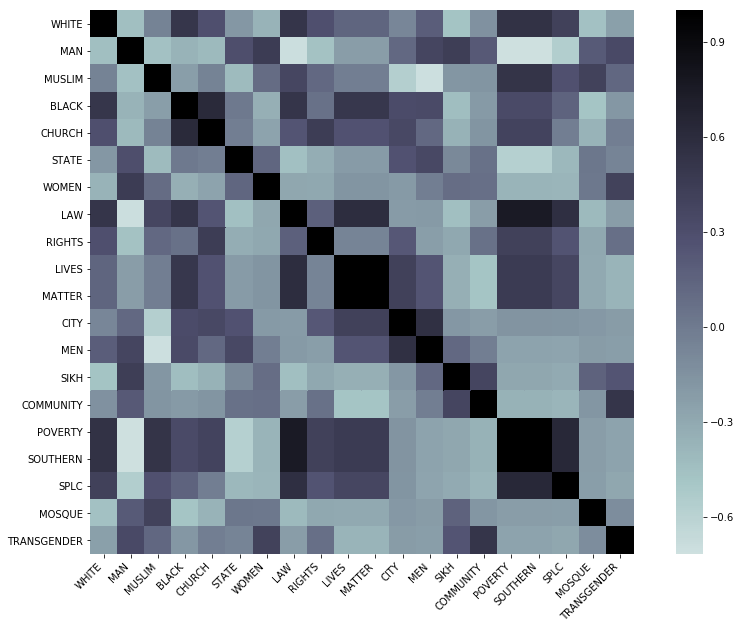

In [302]:
show_heatchart([k[0] for k in Counter(chain(*df_25.keywords)).most_common(20)])

# Keyword Co-occurence in Top Percentile

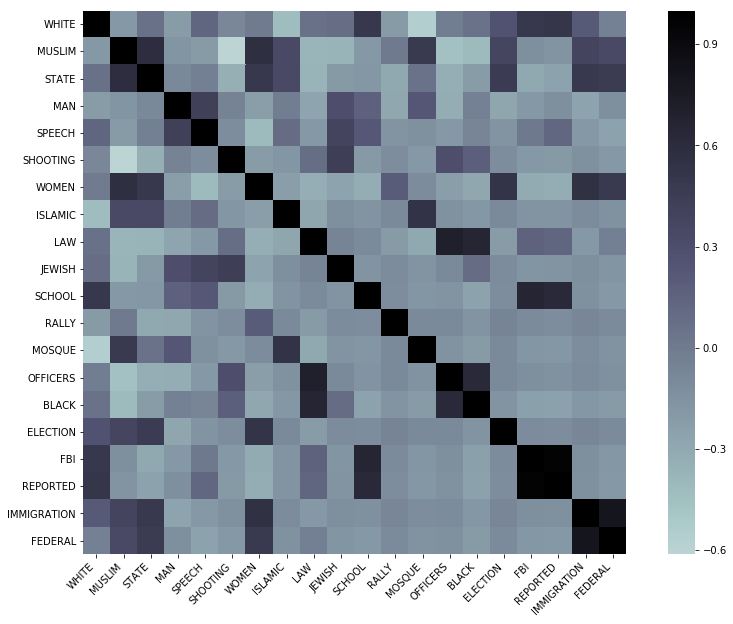

In [303]:
show_heatchart([k[0] for k in Counter(chain(*df_75.keywords)).most_common(20)])

# Keyword Co-occurence in IQR

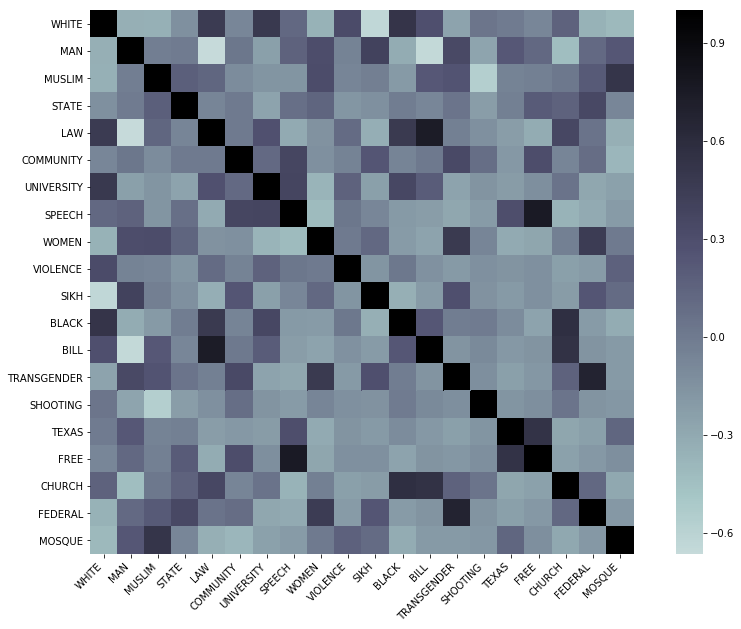

In [304]:
show_heatchart([k[0] for k in Counter(chain(*iqr.keywords)).most_common(20)])

# Events Greater Than a Week in Duration

In [356]:
wg = df[df.length > 7]
wg = wg[['start_end', 'd_val', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
wg.sort_values('length', inplace=True, ascending=False)
wg

,start_end,d_val,ascent,descent,length,movement,articles,keywords
68,20181022_20181110,65.0,6,13,20,124,8782,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHIT..."
31,20161108_20161126,79.0,3,15,19,138,7490,"[MUSLIM, WHITE, ELECTION, WOMEN, STATE]"
20,20160611_20160626,81.0,2,13,16,0,4798,"[ORLANDO, SHOOTING, GAY, ACT, TERROR]"
66,20180803_20180818,31.0,10,5,16,154,2344,"[WHITE, JONES, MAN, SPEECH, FACEBOOK]"
36,20170129_20170212,47.0,7,7,15,0,3061,"[MUSLIM, SPEECH, JEWISH, MAN, BAN, WHITE]"
44,20170521_20170603,86.0,1,12,14,124,2660,"[PORTLAND, MARYLAND, UNIVERSITY, STABBING, COL..."
35,20170119_20170129,82.0,1,9,11,0,2812,"[MUSLIM, MAN, WOMEN, STATE, FEDERAL, LAW]"
49,20170811_20170821,55.0,4,6,11,0,12943,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
2,20150617_20150627,82.0,1,9,11,55,15581,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]"
24,20160812_20160820,67.0,2,6,9,44,1779,"[MUSLIM, IMAM, MAN, MOSQUE, SHOT]"


# Events Less Than a Week in Duration (Excluding Lengths 3 & 4)

In [362]:
wl = df[(df.length <= 7) & (df.length > 4)]
wl = wl[['start_end', 'd_val', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
wl.sort_values('articles', inplace=True, ascending=False)
wl

,start_end,d_val,ascent,descent,length,movement,articles,keywords
34,20170104_20170108,40.0,2,2,5,33,4027,"[CHICAGO, VIDEO, WHITE, VICTIM, MAN]"
19,20160523_20160529,71.0,1,5,7,40,3984,"[LAW, LOUISIANA, LIVES, MATTER, BILL]"
38,20170220_20170226,29.0,4,2,7,0,3385,"[KANSAS, SHOOTING, INDIAN, JEWISH, COMMUNITY]"
57,20180219_20180224,33.0,3,2,6,0,1905,"[WHITE, MAN, SPLC, FAMILY, NRA, LIFE, GUN]"
32,20161127_20161203,57.0,2,4,7,0,1768,"[MUSLIM, LETTER, MOSQUES, ISLAMIC, LETTERS]"
50,20170912_20170916,20.0,3,1,5,18,1687,"[WHITE, RESOLUTION, VIOLENCE, VIRGINIA, CHARLO..."
61,20180402_20180406,40.0,2,2,5,0,1593,"[YOUTUBE, AGHDAM, COMPANY, SAN, WOMEN, SHOOTER..."
10,20151208_20151212,60.0,1,3,5,0,1303,"[MUSLIM, COMMUNITY, SPEECH, GRAFFITI, SIKH, IN..."
71,20181214_20181221,86.0,1,6,7,0,1256,"[WHITE, MAN, SCHOOL, STATE, STUDENT, ANTIHATE,..."
54,20171029_20171104,57.0,2,4,7,0,1091,"[WHITE, CALIPHATE, STUDENT, ISLAMIC, TRUCK, SO..."


# Top Keywords in Windows

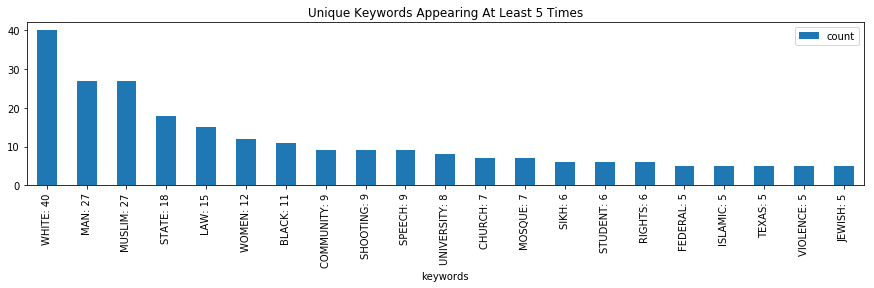

In [305]:
top = 5

all_keywords = list(chain(*df.keywords))

tk_df = pd.DataFrame([['{}: {}'.format(a, b), b] for a, b in Counter(all_keywords).items()], columns=['keywords', 'count'])
tk_df = tk_df[tk_df['count'] >= top]

tk_df.sort_values('count', inplace=True, ascending=False)
tk_df.plot(x='keywords', y='count', kind='bar', title=f'Unique Keywords Appearing At Least {top} Times', figsize=(15, 3))

# Comparing Metrics for Specific Keywords

In [316]:
data  = []
for keyword in tk_df.keywords:
    keyword = keyword.split(':')[0]
    rows = df[df.keywords.apply(lambda x: keyword in x)]
    data.append([keyword, rows.ascent.max(), rows.descent.max(), rows.movement.max(), rows.length.max()])
d = pd.DataFrame(data, columns=['keyword', 'ascent', 'descent', 'movement', 'length']) 
d.sort_values('descent', inplace=True, ascending=False)
d

,keyword,ascent,descent,movement,length
0,WHITE,10,15,156,20
5,WOMEN,3,15,138,19
2,MUSLIM,7,15,138,19
3,STATE,5,15,156,19
8,SHOOTING,6,13,124,20
20,JEWISH,7,13,124,20
9,SPEECH,10,12,154,16
10,UNIVERSITY,3,12,124,14
4,LAW,3,9,71,11
1,MAN,10,9,154,16


In [307]:
df['d_val'] = round((df.descent / df.length) * 100)

In [317]:
check = df[['start_end', 'd_val', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
check = check[check.ascent > 1].sort_values('ascent', ascending=False)

In [322]:
a = check[check.descent < check.ascent].sort_values('articles', ascending=False)
a

,start_end,d_val,ascent,descent,length,movement,articles,keywords
38,20170220_20170226,29.0,4,2,7,0,3385,"[KANSAS, SHOOTING, INDIAN, JEWISH, COMMUNITY]"
66,20180803_20180818,31.0,10,5,16,154,2344,"[WHITE, JONES, MAN, SPEECH, FACEBOOK]"
70,20181125_20181202,25.0,5,2,8,156,1971,"[STATE, WHITE, SWASTIKAS, BLACK, COLLEGE, STUD..."
57,20180219_20180224,33.0,3,2,6,0,1905,"[WHITE, MAN, SPLC, FAMILY, NRA, LIFE, GUN]"
50,20170912_20170916,20.0,3,1,5,18,1687,"[WHITE, RESOLUTION, VIOLENCE, VIRGINIA, CHARLO..."
55,20171112_20171120,22.0,6,2,9,0,1080,"[FBI, 2016, WHITE, REPORTED, SCHOOL, MUSLIM]"
41,20170424_20170429,17.0,4,1,6,44,1068,"[COMMUNITY, SPEECH, STATE, FREE, MAN, WHITE, R..."
37,20170214_20170219,33.0,3,2,6,29,773,"[MUSLIM, NUMBER, WHITE, LAW, STATE, SPLC, BILL]"
26,20160830_20160902,25.0,2,1,4,17,699,"[WHITE, LIVES, MATTER, MUSLIM, LAW, MOVEMENT, ..."
14,20160202_20160209,38.0,4,3,8,76,619,"[MUSLIM, OBAMA, STATE, MOSQUE, CRUZ, MARTIN, T..."


In [323]:
all_keywords = list(chain(*a.keywords))
Counter(all_keywords).most_common(10)

[('WHITE', 11),
 ('MAN', 7),
 ('STATE', 6),
 ('MUSLIM', 5),
 ('COMMUNITY', 4),
 ('SPEECH', 4),
 ('BLACK', 3),
 ('SPLC', 3),
 ('LAW', 3),
 ('UNIVERSITY', 3)]

In [325]:
b = check[check.ascent < check.descent].sort_values('articles', ascending=False)
b

,start_end,d_val,ascent,descent,length,movement,articles,keywords
49,20170811_20170821,55.0,4,6,11,0,12943,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
68,20181022_20181110,65.0,6,13,20,124,8782,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHIT..."
31,20161108_20161126,79.0,3,15,19,138,7490,"[MUSLIM, WHITE, ELECTION, WOMEN, STATE]"
20,20160611_20160626,81.0,2,13,16,0,4798,"[ORLANDO, SHOOTING, GAY, ACT, TERROR]"
24,20160812_20160820,67.0,2,6,9,44,1779,"[MUSLIM, IMAM, MAN, MOSQUE, SHOT]"
32,20161127_20161203,57.0,2,4,7,0,1768,"[MUSLIM, LETTER, MOSQUES, ISLAMIC, LETTERS]"
69,20181111_20181118,62.0,2,5,8,71,1660,"[FBI, WHITE, REPORTED, LAW, 2017]"
60,20180310_20180318,67.0,2,6,9,113,1601,"[WHITE, WOMEN, STATE, IMMIGRATION, MUSLIM, CAL..."
23,20160717_20160724,62.0,2,5,8,71,1593,"[OFFICERS, LAW, ROUGE, TEXAS, BATON, OFFICER]"
54,20171029_20171104,57.0,2,4,7,0,1091,"[WHITE, CALIPHATE, STUDENT, ISLAMIC, TRUCK, SO..."


In [321]:
all_keywords = list(chain(*b.keywords))
Counter(all_keywords).most_common(10)

[('WHITE', 9),
 ('MUSLIM', 5),
 ('STATE', 3),
 ('SHOOTING', 3),
 ('LAW', 3),
 ('MAN', 3),
 ('WOMEN', 2),
 ('UNIVERSITY', 2),
 ('STUDENT', 2),
 ('ISLAMIC', 2)]

# Events Where Descent was Greater than the Mean

In [375]:
base = df[['start_end', 'd_val', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
base[base.descent > base.descent.mean()].sort_values('articles', ascending=False)

,start_end,d_val,ascent,descent,length,movement,articles,keywords
2,20150617_20150627,82.0,1,9,11,55,15581,"[CHURCH, CHARLESTON, SHOOTING, SOUTH, WHITE]"
49,20170811_20170821,55.0,4,6,11,0,12943,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
68,20181022_20181110,65.0,6,13,20,124,8782,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHIT..."
31,20161108_20161126,79.0,3,15,19,138,7490,"[MUSLIM, WHITE, ELECTION, WOMEN, STATE]"
20,20160611_20160626,81.0,2,13,16,0,4798,"[ORLANDO, SHOOTING, GAY, ACT, TERROR]"
19,20160523_20160529,71.0,1,5,7,40,3984,"[LAW, LOUISIANA, LIVES, MATTER, BILL]"
36,20170129_20170212,47.0,7,7,15,0,3061,"[MUSLIM, SPEECH, JEWISH, MAN, BAN, WHITE]"
35,20170119_20170129,82.0,1,9,11,0,2812,"[MUSLIM, MAN, WOMEN, STATE, FEDERAL, LAW]"
44,20170521_20170603,86.0,1,12,14,124,2660,"[PORTLAND, MARYLAND, UNIVERSITY, STABBING, COL..."
66,20180803_20180818,31.0,10,5,16,154,2344,"[WHITE, JONES, MAN, SPEECH, FACEBOOK]"


# Events Where Descent was Less than the Mean

In [373]:
base = df[['start_end', 'd_val', 'ascent', 'descent', 'length', 'movement', 'articles', 'keywords']]
base[base.ascent > base.ascent.mean()].sort_values('articles', ascending=False)

,start_end,d_val,ascent,descent,length,movement,articles,keywords
49,20170811_20170821,55.0,4,6,11,0,12943,"[WHITE, CHARLOTTESVILLE, VIOLENCE, RALLY, SUPR..."
68,20181022_20181110,65.0,6,13,20,124,8782,"[SYNAGOGUE, PITTSBURGH, SHOOTING, JEWISH, WHIT..."
31,20161108_20161126,79.0,3,15,19,138,7490,"[MUSLIM, WHITE, ELECTION, WOMEN, STATE]"
38,20170220_20170226,29.0,4,2,7,0,3385,"[KANSAS, SHOOTING, INDIAN, JEWISH, COMMUNITY]"
36,20170129_20170212,47.0,7,7,15,0,3061,"[MUSLIM, SPEECH, JEWISH, MAN, BAN, WHITE]"
66,20180803_20180818,31.0,10,5,16,154,2344,"[WHITE, JONES, MAN, SPEECH, FACEBOOK]"
70,20181125_20181202,25.0,5,2,8,156,1971,"[STATE, WHITE, SWASTIKAS, BLACK, COLLEGE, STUD..."
57,20180219_20180224,33.0,3,2,6,0,1905,"[WHITE, MAN, SPLC, FAMILY, NRA, LIFE, GUN]"
50,20170912_20170916,20.0,3,1,5,18,1687,"[WHITE, RESOLUTION, VIOLENCE, VIRGINIA, CHARLO..."
55,20171112_20171120,22.0,6,2,9,0,1080,"[FBI, 2016, WHITE, REPORTED, SCHOOL, MUSLIM]"
